# Lab 2: *Kernelized* machine learning

Advanced Topics in Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/notebooks/AdvML_UniTS_2023_Lab_02_Kernel_ridge_regression_and_kPCA.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### *Kernel Regression* and *Kernel Ridge Regression*

Recall that the solution of **linear regression** can also be written as: $w=(X^{T}X)^{-1}X^{T}y=X^{T}(XX^{T})^{-1}y$

Let $X\in R^{N\times d}$: we have $X^{T}X\in R^{d\times d}$ and $K=XX^{T}\in R^{N\times N}$. Whether it is more convenient to (pre)compute which matrix product (among $X^{T}X$, $XX^{T}$) depends on the $d/N$ ratio.

As far as predictions are concerned, we have that: $f(z)=z^{T}w=z^{T} X^{T}(XX^{T})^{-1}y= \alpha^{T}(z)K^{-1}y$, with $\alpha(z)=z^{T}X^{T}=K(z,X)\in R^{1\times N}$.

How can we move to the non-linear regression case?  We just substitute $x\rightarrow \phi(x)$, and the reasoning above can be repeated!

For more information, you can look up [this Medium article](https://knork.medium.com/linear-regression-in-python-from-scratch-with-kernels-e9c37f7975b9) or [this code-first tutorial](https://github.com/luigicarratino/Tutorial_Kernels_MLSS2019_London/blob/master/Tutorial%20Kernel.ipynb).

In [3]:
import numpy as np

from sklearn.datasets import make_moons

**Exercise 1: linear data regression**
1. Generate and plot a dataset consisting in $100$ datapoints in the form $(x_i,y_i)$. The $x_i$ are sampled uniformly in $[2,30]$, whereas the $y_i$ are sampled from a Gaussian distribution centred in $2x_i + 50$ having unit variance.

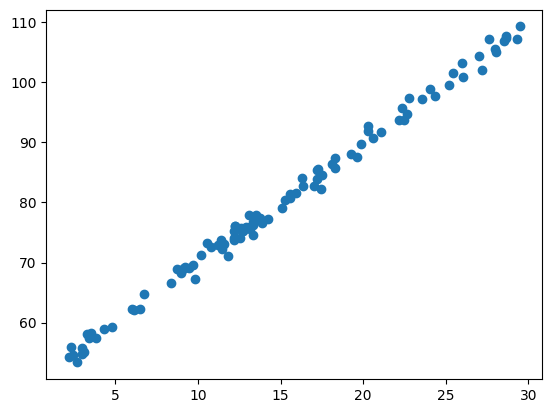

In [4]:
#sample 100 point uniformly in [2,30]
n_samples = 100
x = np.random.uniform(2,30,n_samples)
# sample 100 point from a normal distribution with variance 1 and mean 2x[i] + 50
y = np.random.normal(2*x + 50, 1)

#Plot the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

2. Fit a linear regression model to the data, **with no learnable intercept** (i.e. fix it to zero), and plot the predictions of the resulting model compared to the data.

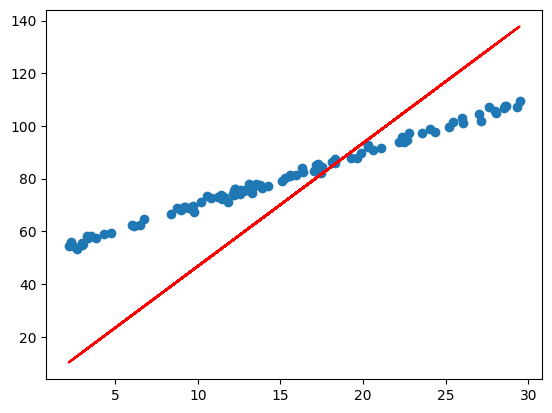

In [5]:
#fit a linear regression model with no learnable intercept
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1,1),y)
model.predict(x.reshape(-1,1))

# plot the data and the linear regression model
plt.scatter(x,y)
plt.plot(x,model.predict(x.reshape(-1,1)),color='red')


3. Fit a linear regression model to the data, **with learnable intercept**, and plot the predictions of the resulting model compared to the data.

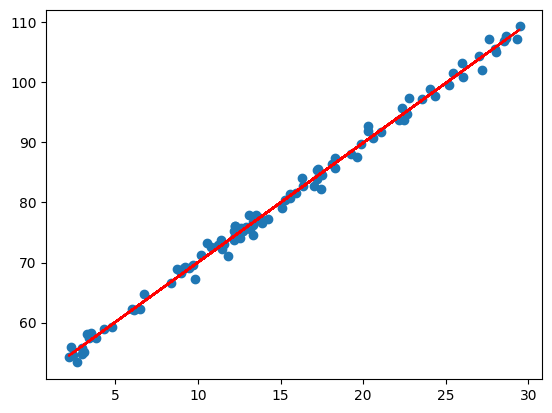

In [6]:
#fit a linear regression model with no learnable intercept
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1,1),y)
model.predict(x.reshape(-1,1))

# plot the data and the linear regression model
plt.scatter(x,y)
plt.plot(x,model.predict(x.reshape(-1,1)),color='red')

4. Fit a linear ridge regression model to the data, and plot the predictions of the resulting model compared to the data.

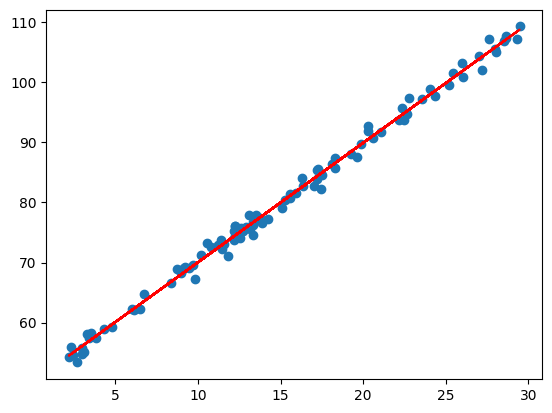

In [7]:
#fit ridge regression model 
from sklearn.linear_model import Ridge
model = Ridge(alpha=1,fit_intercept=True)
model.fit(x.reshape(-1,1),y)
model.predict(x.reshape(-1,1))

# plot the data and the linear regression model
plt.scatter(x,y)
plt.plot(x,model.predict(x.reshape(-1,1)),color='red')

**Exercise 2: Kernel regression on *periodic* data**
1. The following dataset is given. Plot it.

In [8]:
xkr = np.linspace(2, 30, 100)
ykr = xkr + 4 * np.sin(xkr) + 4 * np.random.rand(xkr.shape[0])

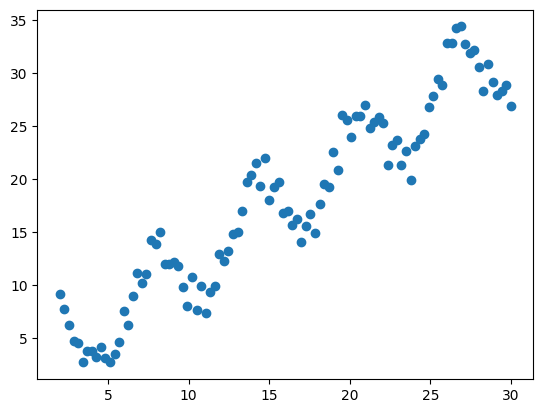

In [9]:
# Plot the data
plt.scatter(xkr, ykr)

2. Define a function that computes the Gaussian kernel value between two vectors, represented as numpy arrays.

In [10]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (sigma ** 2)))

3. With the fuction just defined, compute the Gram matrix of the dataset. Use a Gaussian kernel with $\sigma=1$.

In [11]:
def Gram_matrix(x,y,sigma):
    n = x.shape[0]
    m = y.shape[0]
    G = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            G[i,j] = gaussian_kernel(x[i],y[j],sigma)
    return G
K = Gram_matrix(xkr.reshape(-1,1),xkr.reshape(-1,1),1)
print(K)

[[1.00000000e+000 9.60793360e-001 8.52157700e-001 ... 3.67794957e-164
  1.50818438e-167 5.70904011e-171]
 [9.60793360e-001 1.00000000e+000 9.60793360e-001 ... 8.27974740e-161
  3.67794957e-164 1.50818438e-167]
 [8.52157700e-001 9.60793360e-001 1.00000000e+000 ... 1.72063357e-157
  8.27974740e-161 3.67794957e-164]
 ...
 [3.67794957e-164 8.27974740e-161 1.72063357e-157 ... 1.00000000e+000
  9.60793360e-001 8.52157700e-001]
 [1.50818438e-167 3.67794957e-164 8.27974740e-161 ... 9.60793360e-001
  1.00000000e+000 9.60793360e-001]
 [5.70904011e-171 1.50818438e-167 3.67794957e-164 ... 8.52157700e-001
  9.60793360e-001 1.00000000e+000]]


4. Fit a kernel ridge regression model to the data, and plot the resulting model compared to the data.

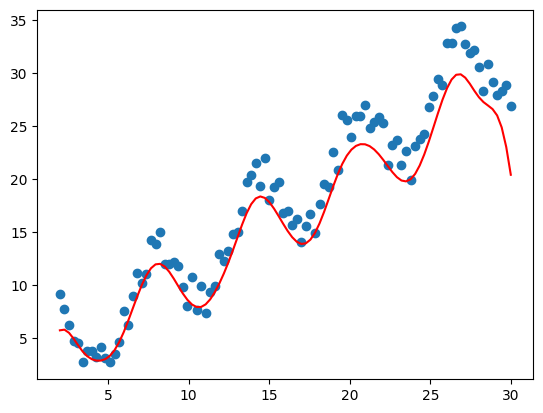

In [13]:
# fit kernel ridge regression model with custom gram matrix
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1,kernel='precomputed')
model.fit(K,ykr)
model.predict(K)

# plot the data and the linear regression model
plt.scatter(xkr,ykr)
plt.plot(xkr,model.predict(K),color='red')


### *Kernel PCA* and the *Radial Basis Function* (RBF) Kernel

Let us briefly recap the key concepts of PCA. We have a dataset $X\in R^{N\times d}$, and we want to find a new basis $Z\in R^{N\times d}$ such that the variance of the projected data is maximized. This is equivalent to finding the eigenvectors of the covariance matrix $C=X^{T}X$.

This requires the data to be centered, i.e. $X_{i}^{(j)}-\mu_{j} \rightarrow X_{i}^{(j)}$, where $\mu_{j}=\frac{1}{N}\sum_{i=1}^{N}X_{i}^{(j)}$ is the mean of the $j$-th feature.

We can also write the eigenvalue problem in components, as follows: $Cz_{j}=\lambda_{j}z_{j}$, where $z_{j}$ is the $j$-th eigenvector and $\lambda_{j}$ is the corresponding eigenvalue. The eigenvectors are orthogonal, i.e. $z_{j}^{T}z_{k}=0$ for $j\neq k$.

Moving to the kernelized case, we operate the substitution $x\rightarrow \phi(x)$, and the eigenvalue problem becomes $C_{K}v=\lambda v$ with $C_{K}=\frac{1}{N}\sum_{i}\phi(x_{i})\phi^{T}(x_{i})$, $\phi(\cdot)$ being a generic feature map.

One can prove that solutions of the eigenvalue problem are in the form $v=\sum_{i}\alpha_{i}\phi(x_{i})$. Multiplying both sides of $C_{K}v=\lambda v$ by $\phi(x_{k})$ and substituting, we obtain $N\lambda \alpha=K \alpha$.

Such reasoning still requires normalization, i.e. $ \phi(x)-\frac{1}{d}\sum_{i}(\phi(x))_{i} \rightarrow \phi(x)$. The resulting kernel $K$ is in the form $K := K-2Id_{1/n}K + Id_{1/n}K Id_{1/n}$ with $Id_{1/n}$ the matrix with entries $1/n$.

A more thorough explanation can be found in [this blogpost](https://sdat.ir/en/sdat-blog/python-kernel-tricks-and-nonlinear-dimensionality-reduction-via-rbf-kernel-pca).


**Exercise 3: Kernel PCA**
1. A *Half Moons* dataset of $100$ points is given below. Plot it.

In [21]:
xhm, yhm = make_moons(n_samples=100, random_state=123)

In [22]:
# YOUR CODE HERE

2. Apply the PCA algorithm to the dataset, and plot the resulting projection using the first 2 principal components.
**Hint**: you can use the `PCA` class from `sklearn.decomposition`.

In [23]:
# YOUR CODE HERE

3. Repeat the previous step, but plotting just the first principal component. Comment on the separability of the two classes.

In [24]:
# YOUR CODE HERE

4. Implement a function that computes the *Radial Basis* PCA algorithm of the dataset, given as a NumPy array.

In [25]:
def kpca(x_data, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        x_data: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: The free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # YOUR CODE HERE
    xpcs = ...
    return xpcs

5. Apply the function just defined to the dataset, and plot the resulting projection using the first 2 principal components.

In [26]:
# YOUR CODE HERE

6. Repeat the previous step, but plotting just the first principal component. Comment on the separability of the two classes.


In [27]:
# YOUR CODE HERE
